In [1]:
from os import walk

dirpath = "Brick";
filenames = next(walk(dirpath), (None, None, []))[2]  # [] if no file
print(filenames)

['ebu3b_brick.ttl', 'ghc_brick.ttl', 'gtc_brick.ttl', 'rice_brick.ttl', 'soda_brick.ttl']


In [2]:
from rdflib import Graph as RDFGraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_digraph

# loadn RDF Graph
dic = {}
for filename in filenames:
    print(filename)
    path = dirpath + "/" + filename
    g = RDFGraph()
    g.parse(path)
    print("rdflib Graph loaded successfully with {} triples".format(len(g)))
    G = rdflib_to_networkx_digraph(g)
    print("networkx Graph loaded successfully with length {}".format(len(G)))
    dic.update({str(filename):G})
# print (dic)

ebu3b_brick.ttl
rdflib Graph loaded successfully with 14572 triples
networkx Graph loaded successfully with length 6375
ghc_brick.ttl
rdflib Graph loaded successfully with 55733 triples
networkx Graph loaded successfully with length 9874
gtc_brick.ttl
rdflib Graph loaded successfully with 8681 triples
networkx Graph loaded successfully with length 2560
rice_brick.ttl
rdflib Graph loaded successfully with 1665 triples
networkx Graph loaded successfully with length 810
soda_brick.ttl
rdflib Graph loaded successfully with 3774 triples
networkx Graph loaded successfully with length 1739


In [3]:
# show complete node
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [4]:
number_of_nodes = {}
for k, v in dic.items():
    v = v.number_of_nodes()
    number_of_nodes.update({k:v})

number_of_nodes_df = pd.DataFrame(data = number_of_nodes,index=[0])
number_of_nodes_df.head(10)

ebu3b_brick.ttl  ghc_brick.ttl  gtc_brick.ttl  rice_brick.ttl  \
0             6375           9874           2560             810   

   soda_brick.ttl  
0            1739

In [5]:
number_of_edges = {}
for k, v in dic.items():
    v = v.number_of_edges()
    number_of_edges.update ({k:v})

number_of_edges_df = pd.DataFrame(data = number_of_edges,index=[0])
number_of_edges_df.head(10)

ebu3b_brick.ttl  ghc_brick.ttl  gtc_brick.ttl  rice_brick.ttl  \
0            14572          54783           8177            1484   

   soda_brick.ttl  
0            3774

In [6]:
prefix_soda = "https://brickschema.org/schema/1.0.2/building_example#"
prefix_ghc = "http://cmu.edu/building/ontology/ghc#"
prefix_rice = "http://virginia.edu/building/ontology/rice#"
prefix_ebu = "http://ucsd.edu/building/ontology/ebu3b#"
prefix_gtc = "https://brickschema.org/schema/1.0.2/building_example#"
prefix = [prefix_soda, prefix_ghc, prefix_rice, prefix_ebu, prefix_gtc]

### Dan's Paper (degree and class hierarchy/depth)

In [7]:
import networkx as nx

dan_summary_soda_df = pd.DataFrame()
dan_summary_ghc_df = pd.DataFrame()
dan_summary_rice_df = pd.DataFrame()
dan_summary_ebu_df = pd.DataFrame()
dan_summary_gtc_df = pd.DataFrame()

In [8]:
# number of degree
for k, v in dic.items():
    number_of_degree_df = pd.DataFrame(data = v.degree(), 
                                           columns = ["node", "number_of_degree"])
    # filter
    if k == "soda_brick.ttl":
        number_of_degree_df = number_of_degree_df[number_of_degree_df['node'].str.startswith(prefix_soda)]
        dan_summary_soda_df = number_of_degree_df
    if k == "ghc_brick.ttl":
        number_of_degree_df = number_of_degree_df[number_of_degree_df['node'].str.startswith(prefix_ghc)]
        dan_summary_ghc_df = number_of_degree_df
    if k == "rice_brick.ttl":
        number_of_degree_df = number_of_degree_df[number_of_degree_df['node'].str.startswith(prefix_rice)]
        dan_summary_rice_df = number_of_degree_df
    if k == "ebu3b_brick.ttl":
        number_of_degree_df = number_of_degree_df[number_of_degree_df['node'].str.startswith(prefix_ebu)]
        dan_summary_ebu_df = number_of_degree_df
    if k == "gtc_brick.ttl":
        number_of_degree_df = number_of_degree_df[number_of_degree_df['node'].str.startswith(prefix_gtc)]
        dan_summary_gtc_df = number_of_degree_df
        
    # sort
    number_of_degree_df = number_of_degree_df.sort_values("number_of_degree", ascending = False)
    # reset index
    number_of_degree_df = number_of_degree_df.reset_index(drop=True)
    
    # print
    print ("file:", k)
    print("data points", len(number_of_degree_df.index))
    print (number_of_degree_df.head(5))
    print ("====================================================================================================")

file: ebu3b_brick.ttl
data points 6179
                                                    node  number_of_degree
0    http://ucsd.edu/building/ontology/ebu3b#EBU3B_AHU_1               487
1  http://ucsd.edu/building/ontology/ebu3b#EBU3B_Floor_3                61
2  http://ucsd.edu/building/ontology/ebu3b#EBU3B_Floor_2                59
3  http://ucsd.edu/building/ontology/ebu3b#EBU3B_Floor_4                58
4  http://ucsd.edu/building/ontology/ebu3b#EBU3B_Floor_1                52
file: ghc_brick.ttl
data points 9681
                                            node  number_of_degree
0  http://cmu.edu/building/ontology/ghc#AHU-12_I               225
1   http://cmu.edu/building/ontology/ghc#AHU-9_I               209
2  http://cmu.edu/building/ontology/ghc#AHU-10_I               194
3  http://cmu.edu/building/ontology/ghc#AHU-11_I               149
4   http://cmu.edu/building/ontology/ghc#AHU-8_I               130
file: gtc_brick.ttl
data points 1989
                                   

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

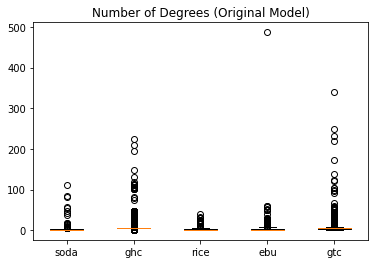

In [10]:
x1 = dan_summary_soda_df.number_of_degree
x2 = dan_summary_ghc_df.number_of_degree
x3 = dan_summary_rice_df.number_of_degree
x4 = dan_summary_ebu_df.number_of_degree
x5 = dan_summary_gtc_df.number_of_degree
plt.boxplot ([x1,x2,x3,x4,x5])
plt.xticks([1,2,3,4,5], ['soda','ghc','rice','ebu', 'gtc'])
plt.title ("Number of Degrees (Original Model)")
plt.savefig('Number of Degrees-Original.jpg', bbox_inches='tight', dpi=500)

### Centrality Analysis

### 1. Heuristic (simple) centrality: Degree centrality (local importance)

In [11]:
import networkx as nx

centrality_summary_soda_df = pd.DataFrame()
centrality_summary_ghc_df = pd.DataFrame()
centrality_summary_rice_df = pd.DataFrame()
centrality_summary_ebu_df = pd.DataFrame()
centrality_summary_gtc_df = pd.DataFrame()

In [12]:
# in-degree centrality
for k, v in dic.items():
    in_degree_centrality_df = pd.DataFrame(data = nx.in_degree_centrality(v).items(), 
                                           columns = ["node", "in_degree_centrality"])
#     print (in_degree_centrality_df.head(10))
    # filter
    if k == "soda_brick.ttl":
        in_degree_centrality_df = in_degree_centrality_df[in_degree_centrality_df['node'].str.startswith(prefix_soda)]
        centrality_summary_soda_df = in_degree_centrality_df
    if k == "ghc_brick.ttl":
        in_degree_centrality_df = in_degree_centrality_df[in_degree_centrality_df['node'].str.startswith(prefix_ghc)]
        centrality_summary_ghc_df = in_degree_centrality_df
    if k == "rice_brick.ttl":
        in_degree_centrality_df = in_degree_centrality_df[in_degree_centrality_df['node'].str.startswith(prefix_rice)]
        centrality_summary_rice_df = in_degree_centrality_df
    if k == "ebu3b_brick.ttl":
        in_degree_centrality_df = in_degree_centrality_df[in_degree_centrality_df['node'].str.startswith(prefix_ebu)]
        centrality_summary_ebu_df = in_degree_centrality_df
    if k == "gtc_brick.ttl":
        in_degree_centrality_df = in_degree_centrality_df[in_degree_centrality_df['node'].str.startswith(prefix_gtc)]
        centrality_summary_gtc_df = in_degree_centrality_df
    
    # sort
    in_degree_centrality_df = in_degree_centrality_df.sort_values("in_degree_centrality", ascending = False)
    
    # print
    print (k)
    print (in_degree_centrality_df.head(10))
    print ("==================================================")

ebu3b_brick.ttl
                                                       node  \
47      http://ucsd.edu/building/ontology/ebu3b#EBU3B_AHU_1   
123   http://ucsd.edu/building/ontology/ebu3b#EBU3B_Floor_3   
1615  http://ucsd.edu/building/ontology/ebu3b#EBU3B_Floor_2   
111   http://ucsd.edu/building/ontology/ebu3b#EBU3B_Floor_4   
31    http://ucsd.edu/building/ontology/ebu3b#EBU3B_Floor_1   
1270   http://ucsd.edu/building/ontology/ebu3b#EBU3B_CRAC_3   
68     http://ucsd.edu/building/ontology/ebu3b#EBU3B_CRAC_4   
322    http://ucsd.edu/building/ontology/ebu3b#EBU3B_CRAC_2   
275    http://ucsd.edu/building/ontology/ebu3b#EBU3B_CRAC_1   
1010     http://ucsd.edu/building/ontology/ebu3b#EBU3B_HVAC   

      in_degree_centrality  
47                0.038908  
123               0.009256  
1615              0.008943  
111               0.008786  
31                0.007844  
1270              0.007531  
68                0.007531  
322               0.007531  
275               0.007531  


In [13]:
# out-degree centrality
for k, v in dic.items():
    out_degree_centrality_df = pd.DataFrame(data = nx.out_degree_centrality(v).items(), 
                                           columns = ["node", "out_degree_centrality"])
    # filter
    if k == "soda_brick.ttl":
        out_degree_centrality_df = out_degree_centrality_df[out_degree_centrality_df['node'].str.startswith(prefix_soda)]
        centrality_summary_soda_df = centrality_summary_soda_df.merge(out_degree_centrality_df, on="node")
    if k == "ghc_brick.ttl":
        out_degree_centrality_df = out_degree_centrality_df[out_degree_centrality_df['node'].str.startswith(prefix_ghc)]
        centrality_summary_ghc_df = centrality_summary_ghc_df.merge(out_degree_centrality_df, on="node")
    if k == "rice_brick.ttl":
        out_degree_centrality_df = out_degree_centrality_df[out_degree_centrality_df['node'].str.startswith(prefix_rice)]
        centrality_summary_rice_df = centrality_summary_rice_df.merge(out_degree_centrality_df, on="node")
    if k == "ebu3b_brick.ttl":
        out_degree_centrality_df = out_degree_centrality_df[out_degree_centrality_df['node'].str.startswith(prefix_ebu)]
        centrality_summary_ebu_df = centrality_summary_ebu_df.merge(out_degree_centrality_df, on="node")
    if k == "gtc_brick.ttl":
        out_degree_centrality_df = out_degree_centrality_df[out_degree_centrality_df['node'].str.startswith(prefix_gtc)]
        centrality_summary_gtc_df = centrality_summary_gtc_df.merge(out_degree_centrality_df, on="node")
    
    # sort
    out_degree_centrality_df = out_degree_centrality_df.sort_values("out_degree_centrality", ascending = False)
    
    # print
    print (k)
    print (out_degree_centrality_df.head(10))
    print ("==================================================")

ebu3b_brick.ttl
                                                               node  \
47              http://ucsd.edu/building/ontology/ebu3b#EBU3B_AHU_1   
642    http://ucsd.edu/building/ontology/ebu3b#EBU3B_RM_2258_WC_ADJ   
512      http://ucsd.edu/building/ontology/ebu3b#EBU3B_RM_2227_ZN_T   
1784    http://ucsd.edu/building/ontology/ebu3b#EBU3B_RM_3260_T_OCC   
2713  http://ucsd.edu/building/ontology/ebu3b#EBU3B_RM_3215_W_C_ADJ   
4412     http://ucsd.edu/building/ontology/ebu3b#EBU3B_RM_1117_ZN_T   
507   http://ucsd.edu/building/ontology/ebu3b#EBU3B_RM_1117_W_C_ADJ   
989      http://ucsd.edu/building/ontology/ebu3b#EBU3B_RM_4119_ZN_T   
2707  http://ucsd.edu/building/ontology/ebu3b#EBU3B_RM_4213_W_C_ADJ   
1786    http://ucsd.edu/building/ontology/ebu3b#EBU3B_RM_3262_T_OCC   

      out_degree_centrality  
47                 0.037496  
642                0.000628  
512                0.000628  
1784               0.000628  
2713               0.000628  
4412               0.0

## 2. Graphical centrality

### (1) Closeness centrality (path spread importance)

In [14]:
# closeness centrality
for k, v in dic.items():
    closeness_centrality_df = pd.DataFrame(data = nx.closeness_centrality(v).items(), 
                                           columns = ["node", "closeness_centrality"])
    # filter
    if k == "soda_brick.ttl":
        closeness_centrality_df = closeness_centrality_df[closeness_centrality_df['node'].str.startswith(prefix_soda)]
        centrality_summary_soda_df = centrality_summary_soda_df.merge(closeness_centrality_df, on="node")
    if k == "ghc_brick.ttl":
        closeness_centrality_df = closeness_centrality_df[closeness_centrality_df['node'].str.startswith(prefix_ghc)]
        centrality_summary_ghc_df = centrality_summary_ghc_df.merge(closeness_centrality_df, on="node")
    if k == "rice_brick.ttl":
        closeness_centrality_df = closeness_centrality_df[closeness_centrality_df['node'].str.startswith(prefix_rice)]
        centrality_summary_rice_df = centrality_summary_rice_df.merge(closeness_centrality_df, on="node")
    if k == "ebu3b_brick.ttl":
        closeness_centrality_df = closeness_centrality_df[closeness_centrality_df['node'].str.startswith(prefix_ebu)]
        centrality_summary_ebu_df = centrality_summary_ebu_df.merge(closeness_centrality_df, on="node")
    if k == "gtc_brick.ttl":
        closeness_centrality_df = closeness_centrality_df[closeness_centrality_df['node'].str.startswith(prefix_gtc)]
        centrality_summary_gtc_df = centrality_summary_gtc_df.merge(closeness_centrality_df, on="node")
    
    # sort
    closeness_centrality_df = closeness_centrality_df.sort_values("closeness_centrality", ascending = False)
    
    # print
    print (k)
    print (closeness_centrality_df.head(10))
    print ("==================================================")

ebu3b_brick.ttl
                                                           node  \
2581              http://ucsd.edu/building/ontology/ebu3b#EBU3B   
123       http://ucsd.edu/building/ontology/ebu3b#EBU3B_Floor_3   
1615      http://ucsd.edu/building/ontology/ebu3b#EBU3B_Floor_2   
111       http://ucsd.edu/building/ontology/ebu3b#EBU3B_Floor_4   
31        http://ucsd.edu/building/ontology/ebu3b#EBU3B_Floor_1   
47          http://ucsd.edu/building/ontology/ebu3b#EBU3B_AHU_1   
1175     http://ucsd.edu/building/ontology/ebu3b#EBU3B_Basement   
2418  http://ucsd.edu/building/ontology/ebu3b#EBU3B_VAV_Rm_B210   
183   http://ucsd.edu/building/ontology/ebu3b#EBU3B_VAV_Rm_B240   
1156  http://ucsd.edu/building/ontology/ebu3b#EBU3B_VAV_Rm_B260   

      closeness_centrality  
2581              0.231444  
123               0.081178  
1615              0.080109  
111               0.079482  
31                0.070198  
47                0.038124  
1175              0.037282  
2418          

### (2) Betweenness centrality (In-between/broker/bridge/middleman importance)

In [15]:
# betweenness centrality
for k, v in dic.items():
    betweenness_centrality_df = pd.DataFrame(data = nx.betweenness_centrality(v).items(), 
                                           columns = ["node", "betweenness_centrality"])
    # filter
    if k == "soda_brick.ttl":
        betweenness_centrality_df = betweenness_centrality_df[betweenness_centrality_df['node'].str.startswith(prefix_soda)]
        centrality_summary_soda_df = centrality_summary_soda_df.merge(betweenness_centrality_df, on="node")
    if k == "ghc_brick.ttl":
        betweenness_centrality_df = betweenness_centrality_df[betweenness_centrality_df['node'].str.startswith(prefix_ghc)]
        centrality_summary_ghc_df = centrality_summary_ghc_df.merge(betweenness_centrality_df, on="node")
    if k == "rice_brick.ttl":
        betweenness_centrality_df = betweenness_centrality_df[betweenness_centrality_df['node'].str.startswith(prefix_rice)]
        centrality_summary_rice_df = centrality_summary_rice_df.merge(betweenness_centrality_df, on="node")
    if k == "ebu3b_brick.ttl":
        betweenness_centrality_df = betweenness_centrality_df[betweenness_centrality_df['node'].str.startswith(prefix_ebu)]
        centrality_summary_ebu_df = centrality_summary_ebu_df.merge(betweenness_centrality_df, on="node")
    if k == "gtc_brick.ttl":
        betweenness_centrality_df = betweenness_centrality_df[betweenness_centrality_df['node'].str.startswith(prefix_gtc)]
        centrality_summary_gtc_df = centrality_summary_gtc_df.merge(betweenness_centrality_df, on="node") 
    # sort
    betweenness_centrality_df = betweenness_centrality_df.sort_values("betweenness_centrality", ascending = False)
    
    # print
    print (k)
    print (betweenness_centrality_df.head(10))
    print ("==================================================")

ebu3b_brick.ttl
                                                                  node  \
47                 http://ucsd.edu/building/ontology/ebu3b#EBU3B_AHU_1   
2581                     http://ucsd.edu/building/ontology/ebu3b#EBU3B   
123              http://ucsd.edu/building/ontology/ebu3b#EBU3B_Floor_3   
1615             http://ucsd.edu/building/ontology/ebu3b#EBU3B_Floor_2   
111              http://ucsd.edu/building/ontology/ebu3b#EBU3B_Floor_4   
31               http://ucsd.edu/building/ontology/ebu3b#EBU3B_Floor_1   
1175            http://ucsd.edu/building/ontology/ebu3b#EBU3B_Basement   
626   http://ucsd.edu/building/ontology/ebu3b#EBU3B_AHU_1_Supply_Fan_1   
216   http://ucsd.edu/building/ontology/ebu3b#EBU3B_AHU_1_Supply_Fan_2   
219   http://ucsd.edu/building/ontology/ebu3b#EBU3B_AHU_1_Supply_Fan_3   

      betweenness_centrality  
47                  0.003237  
2581                0.000137  
123                 0.000098  
1615                0.000097  
111           

## 3. Logical centrality

###  (1) PageRank centrality

In [16]:
# pagerank centrality
for k, v in dic.items():
    pagerank_centrality_df = pd.DataFrame(data = nx.pagerank(v).items(), 
                                           columns = ["node", "pagerank_centrality"])
    # filter
    if k == "soda_brick.ttl":
        pagerank_centrality_df = pagerank_centrality_df[pagerank_centrality_df['node'].str.startswith(prefix_soda)]
        centrality_summary_soda_df = centrality_summary_soda_df.merge(pagerank_centrality_df, on="node")
    if k == "ghc_brick.ttl":
        pagerank_centrality_df = pagerank_centrality_df[pagerank_centrality_df['node'].str.startswith(prefix_ghc)]
        centrality_summary_ghc_df = centrality_summary_ghc_df.merge(pagerank_centrality_df, on="node")
    if k == "rice_brick.ttl":
        pagerank_centrality_df = pagerank_centrality_df[pagerank_centrality_df['node'].str.startswith(prefix_rice)]
        centrality_summary_rice_df = centrality_summary_rice_df.merge(pagerank_centrality_df, on="node")
    if k == "ebu3b_brick.ttl":
        pagerank_centrality_df = pagerank_centrality_df[pagerank_centrality_df['node'].str.startswith(prefix_ebu)]
        centrality_summary_ebu_df = centrality_summary_ebu_df.merge(pagerank_centrality_df, on="node")
    if k == "gtc_brick.ttl":
        pagerank_centrality_df = pagerank_centrality_df[pagerank_centrality_df['node'].str.startswith(prefix_gtc)]
        centrality_summary_gtc_df = centrality_summary_gtc_df.merge(pagerank_centrality_df, on="node")
    
    # sort
    pagerank_centrality_df = pagerank_centrality_df.sort_values("pagerank_centrality", ascending = False)
    
    # print
    print (k)
    print (pagerank_centrality_df.head(10))
    print ("==================================================")

ebu3b_brick.ttl
                                                        node  \
2581           http://ucsd.edu/building/ontology/ebu3b#EBU3B   
123    http://ucsd.edu/building/ontology/ebu3b#EBU3B_Floor_3   
1615   http://ucsd.edu/building/ontology/ebu3b#EBU3B_Floor_2   
111    http://ucsd.edu/building/ontology/ebu3b#EBU3B_Floor_4   
31     http://ucsd.edu/building/ontology/ebu3b#EBU3B_Floor_1   
47       http://ucsd.edu/building/ontology/ebu3b#EBU3B_AHU_1   
1175  http://ucsd.edu/building/ontology/ebu3b#EBU3B_Basement   
1270    http://ucsd.edu/building/ontology/ebu3b#EBU3B_CRAC_3   
275     http://ucsd.edu/building/ontology/ebu3b#EBU3B_CRAC_1   
322     http://ucsd.edu/building/ontology/ebu3b#EBU3B_CRAC_2   

      pagerank_centrality  
2581             0.016258  
123              0.009092  
1615             0.008933  
111              0.008851  
31               0.007709  
47               0.005930  
1175             0.003584  
1270             0.001429  
275              0.001429  

### (2) Hit: Authority and Hub scores (inward and outward importance)

In [17]:
for k, v in dic.items():
    # hits
    hub_scores, auth_scores = nx.hits(v)
    
    # hub score
    hub_centrality_df = pd.DataFrame(data = hub_scores.items(), 
                                           columns = ["node", "hub_centrality"])
    # filter
    if k == "soda_brick.ttl":
        hub_centrality_df = hub_centrality_df[hub_centrality_df['node'].str.startswith(prefix_soda)]
        centrality_summary_soda_df = centrality_summary_soda_df.merge(hub_centrality_df, on="node")
    if k == "ghc_brick.ttl":
        hub_centrality_df = hub_centrality_df[hub_centrality_df['node'].str.startswith(prefix_ghc)]
        centrality_summary_ghc_df = centrality_summary_ghc_df.merge(hub_centrality_df, on="node")
    if k == "rice_brick.ttl":
        hub_centrality_df = hub_centrality_df[hub_centrality_df['node'].str.startswith(prefix_rice)]
        centrality_summary_rice_df = centrality_summary_rice_df.merge(hub_centrality_df, on="node")
    if k == "ebu3b_brick.ttl":
        hub_centrality_df = hub_centrality_df[hub_centrality_df['node'].str.startswith(prefix_ebu)]
        centrality_summary_ebu_df = centrality_summary_ebu_df.merge(hub_centrality_df, on="node")
    if k == "gtc_brick.ttl":
        hub_centrality_df = hub_centrality_df[hub_centrality_df['node'].str.startswith(prefix_gtc)]
        centrality_summary_gtc_df = centrality_summary_gtc_df.merge(hub_centrality_df, on="node")
    
    # sort
    hub_centrality_df = hub_centrality_df.sort_values("hub_centrality", ascending = False)
    
    # print
    print (k)
    print (hub_centrality_df.head(10))
    print ("==================================================")
    
    
    # authority score
    auth_centrality_df = pd.DataFrame(data = auth_scores.items(), 
                                           columns = ["node", "auth_centrality"])
    # filter
    if k == "soda_brick.ttl":
        auth_centrality_df = auth_centrality_df[auth_centrality_df['node'].str.startswith(prefix_soda)]
        centrality_summary_soda_df = centrality_summary_soda_df.merge(auth_centrality_df, on="node")
    if k == "ghc_brick.ttl":
        auth_centrality_df = auth_centrality_df[auth_centrality_df['node'].str.startswith(prefix_ghc)]
        centrality_summary_ghc_df = centrality_summary_ghc_df.merge(auth_centrality_df, on="node")
    if k == "rice_brick.ttl":
        auth_centrality_df = auth_centrality_df[auth_centrality_df['node'].str.startswith(prefix_rice)]
        centrality_summary_rice_df = centrality_summary_rice_df.merge(auth_centrality_df, on="node")
    if k == "ebu3b_brick.ttl":
        auth_centrality_df = auth_centrality_df[auth_centrality_df['node'].str.startswith(prefix_ebu)]
        centrality_summary_ebu_df = centrality_summary_ebu_df.merge(auth_centrality_df, on="node")
    if k == "gtc_brick.ttl":
        auth_centrality_df = auth_centrality_df[auth_centrality_df['node'].str.startswith(prefix_gtc)]
        centrality_summary_gtc_df = centrality_summary_gtc_df.merge(auth_centrality_df, on="node")
    
    # sort
    auth_centrality_df = auth_centrality_df.sort_values("auth_centrality", ascending = False)
    
    # print
    print (k)
    print (auth_centrality_df.head(10))
    print ("==================================================")

ebu3b_brick.ttl
                                                              node  \
449        http://ucsd.edu/building/ontology/ebu3b#EBU3B_RF3_REF_2   
680        http://ucsd.edu/building/ontology/ebu3b#EBU3B_SF3_REF_1   
5010  http://ucsd.edu/building/ontology/ebu3b#EBU3B_RF1_AI1_ACTUAL   
4078     http://ucsd.edu/building/ontology/ebu3b#EBU3B_RF3_DO1_CMD   
4077     http://ucsd.edu/building/ontology/ebu3b#EBU3B_SF1_DO1_CMD   
1183     http://ucsd.edu/building/ontology/ebu3b#EBU3B_RF1_DO2_CMD   
1933     http://ucsd.edu/building/ontology/ebu3b#EBU3B_RF4_AO1_CMD   
2755     http://ucsd.edu/building/ontology/ebu3b#EBU3B_SF3_DO1_CMD   
407   http://ucsd.edu/building/ontology/ebu3b#EBU3B_SF1_AI2_ACTUAL   
46      http://ucsd.edu/building/ontology/ebu3b#EBU3B_RF1_PID_GAIN   

      hub_centrality  
449          0.00376  
680          0.00376  
5010         0.00376  
4078         0.00376  
4077         0.00376  
1183         0.00376  
1933         0.00376  
2755         0.00376  
407   

In [18]:
print(centrality_summary_rice_df)

                                                                                          node  \
0              http://virginia.edu/building/ontology/rice#TEMP1_Space_Temperature_Perm_Rm_I228   
1                                        http://virginia.edu/building/ontology/rice#HVAC_Zone2   
2                                           http://virginia.edu/building/ontology/rice#Room207   
3                                             http://virginia.edu/building/ontology/rice#AHU_1   
4                                              http://virginia.edu/building/ontology/rice#VAV1   
..                                                                                         ...   
690  http://virginia.edu/building/ontology/rice#economizerDisableFixedDewPointA2nd_Floor_Area1   
691                  http://virginia.edu/building/ontology/rice#Return_Air_CO2_Sensordac3UIP36   
692                                        http://virginia.edu/building/ontology/rice#HWS_Temp   
693             http

In [19]:
# df = pd.DataFrame(columns = ['node','in_degree_centrality','out_degree_centrality','closeness_centrality','betweenness_centrality','pagerank_centrality','hub_centrality','hub_centrality'])

centrality_summary_soda_vav = centrality_summary_soda_df[centrality_summary_soda_df['node'].str.contains("https://brickschema.org/schema/1.0.2/building_example#vav")] 
centrality_summary_ghc_vav = centrality_summary_ghc_df[centrality_summary_ghc_df['node'].str.contains("http://cmu.edu/building/ontology/ghc#VAV_Room")] 
centrality_summary_rice_vav = centrality_summary_rice_df[centrality_summary_rice_df['node'].str.contains("http://virginia.edu/building/ontology/rice#VAV")] 
centrality_summary_ebu_vav = centrality_summary_ebu_df[centrality_summary_ebu_df['node'].str.contains("http://ucsd.edu/building/ontology/ebu3b#EBU3B_VAV") & centrality_summary_ebu_df['node'].str.contains("\d$")] 
centrality_summary_gtc_vav = centrality_summary_gtc_df[centrality_summary_gtc_df['node'].str.contains("https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs") & centrality_summary_gtc_df['node'].str.endswith("vav")]

centrality_summary_gtc_vav

node  \
63     https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/9/vav   
113    https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/0/vav   
168    https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/8/vav   
177    https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/6/vav   
279    https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/4/vav   
363    https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/3/vav   
392   https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/10/vav   
420    https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/7/vav   
438    https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/2/vav   
718   https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/11/vav   
1021   https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/1/vav   
1045   https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/5/vav   

      in_degree_centrality  out_degree_centrality  closeness_centrality  \
63                0.003126               0.001954              0.021114   
113               0.003126               0.001954              0.024610   
168               0.003126               0.001954              0.024069   
177               0.003126               0.001954              0.018806   
279               0.003126               0.001954              0.022960   
363               0.003126               0.001954              0.023864   
392               0.003126               0.001954              0.026513   
420               0.003126               0.001954              0.023084   
438               0.003126               0.001954              0.009060   
718               0.003126               0.001954              0.024264   
1021              0.003126               0.001954              0.024840   
1045              0.003126               0.001954              0.024237   

      betweenness_centrality  pagerank_centrality  hub_centrality  \
63                  0.000686             0.000465        0.000068   
113                 0.000915             0.000476        0.000072   
168                 0.000870             0.000473        0.000070   
177                 0.000617             0.000470        0.000068   
279                 0.000807             0.000477        0.000069   
363                 0.000887             0.000481        0.000072   
392                 0.000947             0.000471        0.000072   
420                 0.000813             0.000472        0.000069   
438                 0.000371             0.000462        0.000065   
718                 0.000874             0.000471        0.000071   
1021                0.000812             0.000464        0.000067   
1045                0.000819             0.000472        0.000071   

      auth_centrality  
63           0.000214  
113          0.000172  
168          0.000191  
177          0.000153  
279          0.000184  
363          0.000168  
392          0.000212  
420          0.000200  
438          0.000140  
718          0.000196  
1021         0.000165  
1045         0.000216

In [20]:
centrality_summary_soda_vav = centrality_summary_soda_vav.rename(columns={"node":"Node of VAVs"})
centrality_summary_soda_vav = centrality_summary_soda_vav.rename(columns={"in_degree_centrality":"in_degree"})
centrality_summary_soda_vav = centrality_summary_soda_vav.rename(columns={"out_degree_centrality":"out_degree"})
centrality_summary_soda_vav = centrality_summary_soda_vav.rename(columns={"closeness_centrality":"closeness"})
centrality_summary_soda_vav = centrality_summary_soda_vav.rename(columns={"betweenness_centrality":"betweenness"})
centrality_summary_soda_vav = centrality_summary_soda_vav.rename(columns={"pagerank_centrality":"pagerank"})
centrality_summary_soda_vav = centrality_summary_soda_vav.rename(columns={"hub_centrality":"hub"})
centrality_summary_soda_vav = centrality_summary_soda_vav.rename(columns={"auth_centrality":"authority"})

centrality_summary_soda_vav['total'] = centrality_summary_soda_vav[['in_degree','out_degree','closeness', 'betweenness', 'pagerank', 'hub', 'authority']].mean(axis=1)

centrality_summary_soda_vav = centrality_summary_soda_vav.sort_values(by='total',ascending=False)

centrality_summary_soda_vav

Node of VAVs  \
233     https://brickschema.org/schema/1.0.2/building_example#vav_R369   
875     https://brickschema.org/schema/1.0.2/building_example#vav_R441   
523     https://brickschema.org/schema/1.0.2/building_example#vav_R447   
176     https://brickschema.org/schema/1.0.2/building_example#vav_R449   
99      https://brickschema.org/schema/1.0.2/building_example#vav_R445   
...                                                                ...   
349   https://brickschema.org/schema/1.0.2/building_example#vav_R582_2   
747     https://brickschema.org/schema/1.0.2/building_example#vav_R452   
297     https://brickschema.org/schema/1.0.2/building_example#vav_R179   
1041    https://brickschema.org/schema/1.0.2/building_example#vav_R183   
541     https://brickschema.org/schema/1.0.2/building_example#vav_R181   

      in_degree  out_degree  closeness  betweenness  pagerank       hub  \
233    0.001151    0.004028   0.001151     0.000004  0.000282  0.005023   
875    0.000575    0.004028   0.000575     0.000002  0.000280  0.005023   
523    0.000575    0.004028   0.000575     0.000002  0.000280  0.005023   
176    0.000575    0.004028   0.000575     0.000002  0.000280  0.005023   
99     0.000575    0.004028   0.000575     0.000002  0.000280  0.005023   
...         ...         ...        ...          ...       ...       ...   
349    0.000575    0.001726   0.000575     0.000001  0.000279  0.002967   
747    0.000575    0.001726   0.000575     0.000001  0.000279  0.002967   
297    0.000000    0.002301   0.000000     0.000000  0.000277  0.002976   
1041   0.000000    0.002301   0.000000     0.000000  0.000277  0.002976   
541    0.000000    0.002301   0.000000     0.000000  0.000277  0.002976   

         authority     total  
233   1.419707e-18  0.001663  
875   2.566546e-18  0.001498  
523   2.566546e-18  0.001498  
176   2.566546e-18  0.001498  
99    2.566546e-18  0.001498  
...            ...       ...  
349  -1.146840e-18  0.000875  
747  -1.146840e-18  0.000875  
297   0.000000e+00  0.000793  
1041  0.000000e+00  0.000793  
541   0.000000e+00  0.000793  

[243 rows x 9 columns]

In [77]:
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

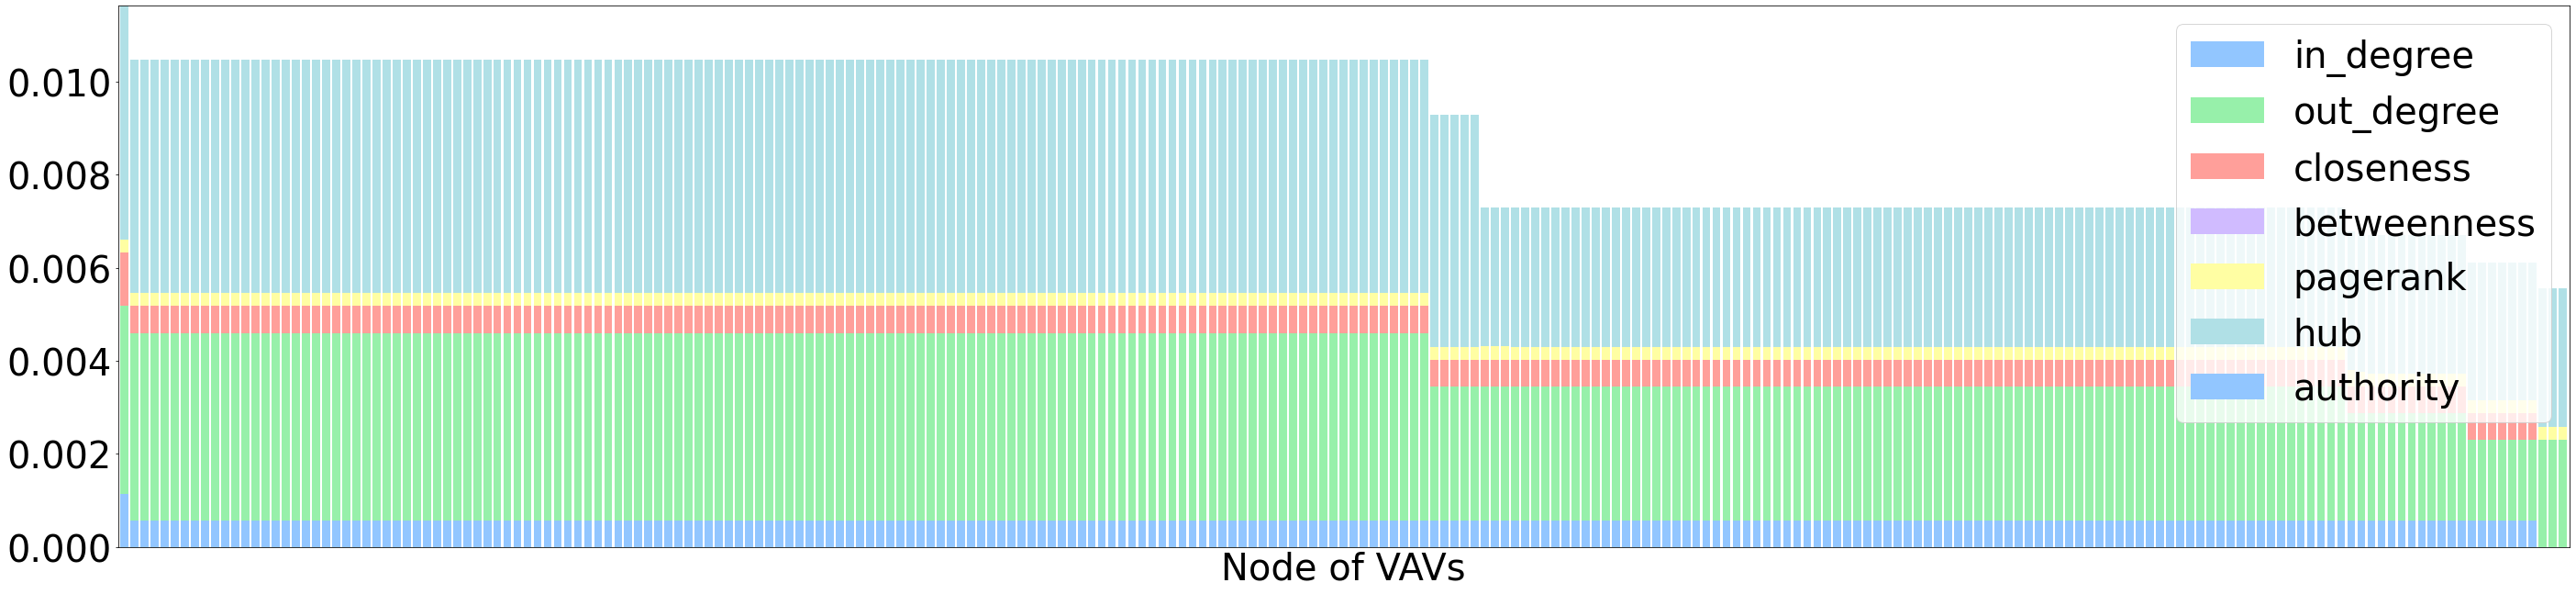

In [37]:
import matplotlib 
# matplotlib.rc('xtick', labelsize=20) 
# matplotlib.rc('ytick', labelsize=20)

plt.style.use('seaborn-pastel')
# plt.style.use('ggplot')

centrality_summary_soda_vav.plot(x="Node of VAVs", y=["in_degree", "out_degree", "closeness", "betweenness", "pagerank", "hub", "authority"], \
                                 kind="bar", stacked=True, figsize=(40, 10), width=0.8)
plt.xticks([])
plt.legend(loc='upper right')
plt.tight_layout()

plt.savefig("soda.png", format="png", bbox_inches = 'tight', pad_inches = 0)
plt.show()

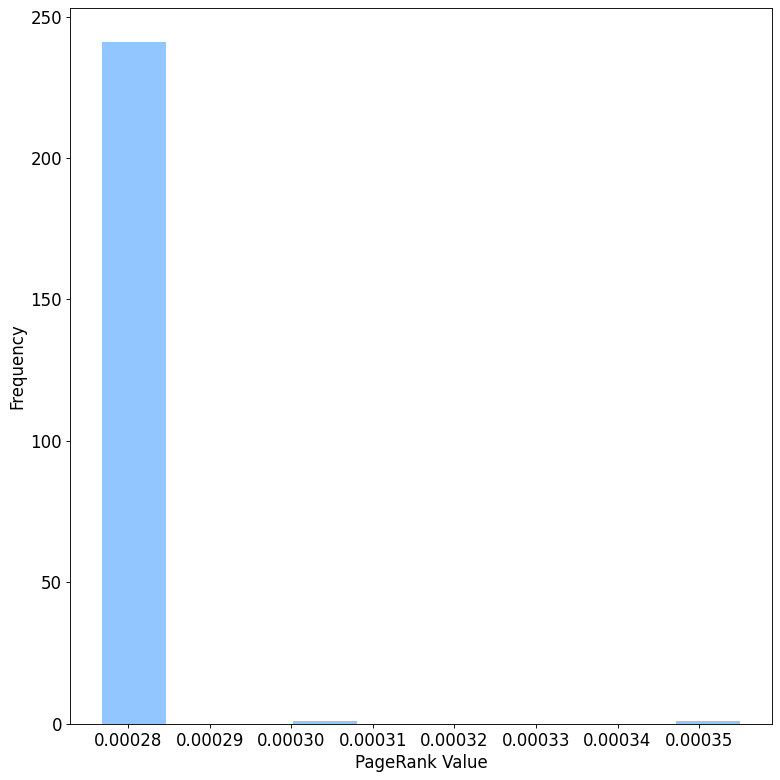

In [78]:
# centrality_summary_soda_vav.plot(x="Node of VAVs", y=["pagerank"], \
#                                  kind="bar", stacked=True, figsize=(8, 10), width=1.0, legend = None)
plt.figure(figsize=(10, 10), dpi=80)
plt.hist(centrality_summary_soda_vav.pagerank)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('PageRank Value');
# plt.xticks([])
# plt.legend(loc='upper left')
plt.tight_layout()

plt.savefig("soda-page.png", format="png", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [59]:
centrality_summary_ghc_vav = centrality_summary_ghc_vav.rename(columns={"node":"Node of VAVs"})
centrality_summary_ghc_vav = centrality_summary_ghc_vav.rename(columns={"in_degree_centrality":"in_degree"})
centrality_summary_ghc_vav = centrality_summary_ghc_vav.rename(columns={"out_degree_centrality":"out_degree"})
centrality_summary_ghc_vav = centrality_summary_ghc_vav.rename(columns={"closeness_centrality":"closeness"})
centrality_summary_ghc_vav = centrality_summary_ghc_vav.rename(columns={"betweenness_centrality":"betweenness"})
centrality_summary_ghc_vav = centrality_summary_ghc_vav.rename(columns={"pagerank_centrality":"pagerank"})
centrality_summary_ghc_vav = centrality_summary_ghc_vav.rename(columns={"hub_centrality":"hub"})
centrality_summary_ghc_vav = centrality_summary_ghc_vav.rename(columns={"auth_centrality":"authority"})

centrality_summary_ghc_vav['total'] = centrality_summary_ghc_vav[['in_degree','out_degree','closeness', 'betweenness', 'pagerank', 'hub', 'authority']].mean(axis=1)

centrality_summary_ghc_vav = centrality_summary_ghc_vav.sort_values(by='total',ascending=False)

centrality_summary_ghc_vav

Node of VAVs  \
170      http://cmu.edu/building/ontology/ghc#VAV_Room_4215_Classroom   
584   http://cmu.edu/building/ontology/ghc#VAV_Room_9022_Project_Room   
2227  http://cmu.edu/building/ontology/ghc#VAV_Room_6002_Project_Room   
310     http://cmu.edu/building/ontology/ghc#VAV_Room_8102_Conference   
2712  http://cmu.edu/building/ontology/ghc#VAV_Room_8014_Open_Project   
...                                                               ...   
1499    http://cmu.edu/building/ontology/ghc#VAV_Room_9215_OfficeZone   
6809    http://cmu.edu/building/ontology/ghc#VAV_Room_9213_OfficeZone   
4365    http://cmu.edu/building/ontology/ghc#VAV_Room_9211_OfficeZone   
3583    http://cmu.edu/building/ontology/ghc#VAV_Room_9217_OfficeZone   
5082   http://cmu.edu/building/ontology/ghc#VAV_Room_9214_StorageZone   

      in_degree  out_degree  closeness   betweenness  pagerank       hub  \
170    0.002330    0.002431   0.004549  1.869023e-05  0.000312  0.000104   
584    0.002330    0.002431   0.004451  1.640115e-05  0.000306  0.000104   
2227   0.002330    0.002431   0.004451  1.631625e-05  0.000304  0.000104   
310    0.002330    0.002431   0.004451  1.631625e-05  0.000304  0.000104   
2712   0.002330    0.002431   0.004451  1.631625e-05  0.000304  0.000104   
...         ...         ...        ...           ...       ...       ...   
1499   0.000203    0.000405   0.000965  1.846793e-07  0.000057  0.000104   
6809   0.000203    0.000405   0.000965  1.846793e-07  0.000057  0.000104   
4365   0.000203    0.000405   0.000965  1.846793e-07  0.000057  0.000104   
3583   0.000203    0.000405   0.000965  1.846793e-07  0.000057  0.000104   
5082   0.000203    0.000405   0.000915  1.744193e-07  0.000057  0.000104   

      authority     total  
170    0.000418  0.001452  
584    0.000420  0.001437  
2227   0.000422  0.001437  
310    0.000422  0.001437  
2712   0.000422  0.001437  
...         ...       ...  
1499   0.000036  0.000253  
6809   0.000036  0.000253  
4365   0.000036  0.000253  
3583   0.000036  0.000253  
5082   0.000036  0.000246  

[1253 rows x 9 columns]

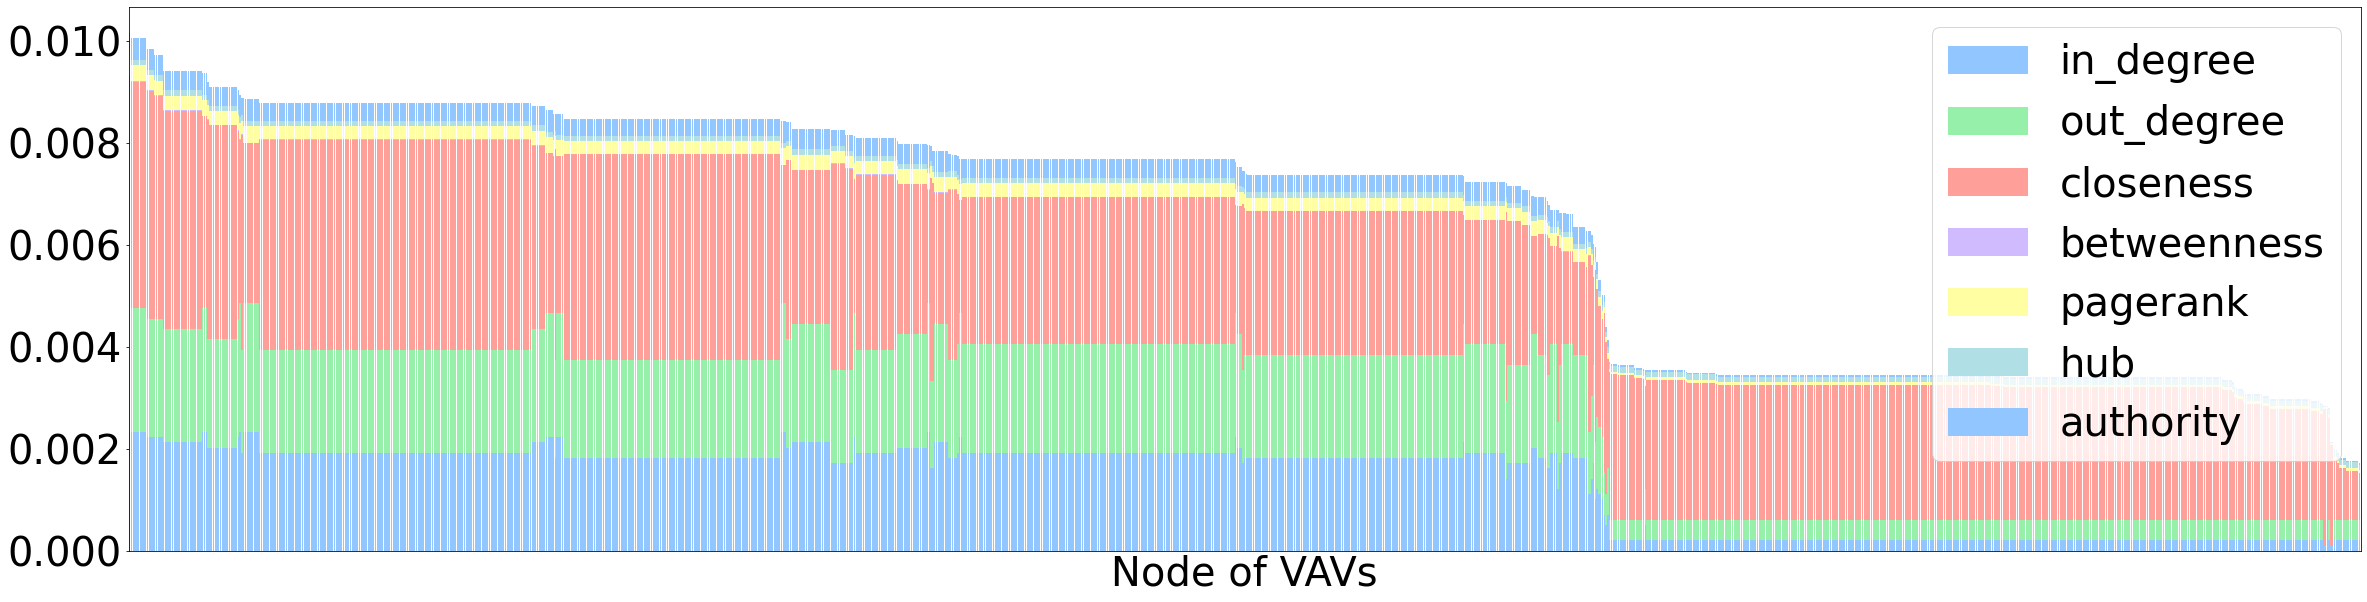

In [40]:
centrality_summary_ghc_vav.plot(x="Node of VAVs", y=["in_degree", "out_degree", "closeness", "betweenness", "pagerank", "hub", "authority"], \
                                 kind="bar", figsize=(40, 10), stacked=True, width=0.8)
plt.xticks([])
plt.legend(loc='upper right')

plt.savefig("ghc.png", format="png", bbox_inches = 'tight', pad_inches = 0)
plt.show()

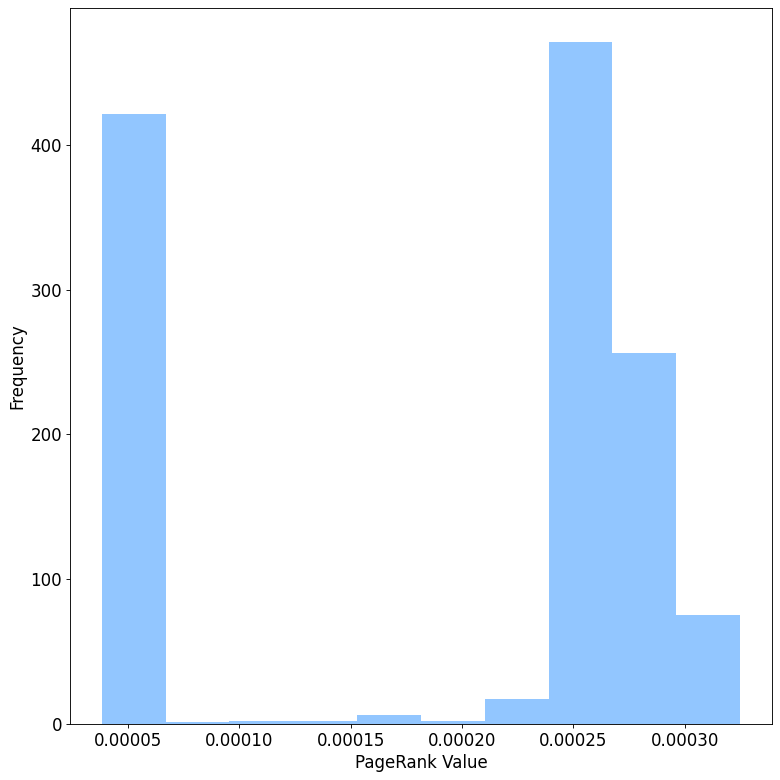

In [79]:
# centrality_summary_ghc_vav.plot(x="Node of VAVs", y=["pagerank"], \
#                                  kind="hist", figsize=(8, 10), stacked=True, width=1.0, legend = None)

plt.figure(figsize=(10, 10), dpi=80)
plt.hist(centrality_summary_ghc_vav.pagerank)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('PageRank Value');
# plt.xticks([])
# plt.legend(loc='upper right')

plt.tight_layout()

plt.savefig("ghc-page.png", format="png", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [27]:
centrality_summary_rice_vav = centrality_summary_rice_vav.rename(columns={"node":"Node of VAVs"})
centrality_summary_rice_vav = centrality_summary_rice_vav.rename(columns={"in_degree_centrality":"in_degree"})
centrality_summary_rice_vav = centrality_summary_rice_vav.rename(columns={"out_degree_centrality":"out_degree"})
centrality_summary_rice_vav = centrality_summary_rice_vav.rename(columns={"closeness_centrality":"closeness"})
centrality_summary_rice_vav = centrality_summary_rice_vav.rename(columns={"betweenness_centrality":"betweenness"})
centrality_summary_rice_vav = centrality_summary_rice_vav.rename(columns={"pagerank_centrality":"pagerank"})
centrality_summary_rice_vav = centrality_summary_rice_vav.rename(columns={"hub_centrality":"hub"})
centrality_summary_rice_vav = centrality_summary_rice_vav.rename(columns={"auth_centrality":"authority"})

centrality_summary_rice_vav['total'] = centrality_summary_rice_vav[['in_degree','out_degree','closeness', 'betweenness', 'pagerank', 'hub', 'authority']].mean(axis=1)

centrality_summary_rice_vav = centrality_summary_rice_vav.sort_values(by='total',ascending=False)

centrality_summary_rice_vav

Node of VAVs  \
59                     http://virginia.edu/building/ontology/rice#VAV2   
90                     http://virginia.edu/building/ontology/rice#VAV3   
4                      http://virginia.edu/building/ontology/rice#VAV1   
52                     http://virginia.edu/building/ontology/rice#VAV4   
131                    http://virginia.edu/building/ontology/rice#VAV5   
78                     http://virginia.edu/building/ontology/rice#VAV6   
229                    http://virginia.edu/building/ontology/rice#VAV8   
277                    http://virginia.edu/building/ontology/rice#VAV7   
27    http://virginia.edu/building/ontology/rice#VAV_26_HW_Supply_Temp   
473      http://virginia.edu/building/ontology/rice#VAV_HW_Return_Temp   
489      http://virginia.edu/building/ontology/rice#VAV_HW_Supply_Temp   
506   http://virginia.edu/building/ontology/rice#VAV_26_HW_Return_Temp   
541  http://virginia.edu/building/ontology/rice#VAV_211_HW_Return_Temp   
548  http://virginia.edu/building/ontology/rice#VAV_211_HW_Supply_Temp   

     in_degree  out_degree  closeness  betweenness  pagerank           hub  \
59    0.001236    0.048208   0.001236     0.000155  0.000800  7.238167e-03   
90    0.001236    0.038319   0.001236     0.000119  0.000800  6.498115e-03   
4     0.001236    0.030902   0.001236     0.000132  0.000800  5.933497e-03   
52    0.001236    0.028430   0.001236     0.000095  0.000800  5.789286e-03   
131   0.001236    0.023486   0.001236     0.000078  0.001153  5.448547e-03   
78    0.001236    0.012361   0.001236     0.000044  0.001153  4.718375e-03   
229   0.001236    0.007417   0.001236     0.000020  0.001153  4.420093e-03   
277   0.001236    0.006180   0.001236     0.000020  0.001153  4.348534e-03   
27    0.000000    0.001236   0.000000     0.000000  0.000623  4.445473e-20   
473   0.000000    0.001236   0.000000     0.000000  0.000623  3.954316e-20   
489   0.000000    0.001236   0.000000     0.000000  0.000623  4.445473e-20   
506   0.000000    0.001236   0.000000     0.000000  0.000623  3.954316e-20   
541   0.000000    0.001236   0.000000     0.000000  0.000623  3.954316e-20   
548   0.000000    0.001236   0.000000     0.000000  0.000623  4.445473e-20   

        authority     total  
59   1.644841e-06  0.008411  
90   1.644841e-06  0.006887  
4    1.644841e-06  0.005749  
52   1.644841e-06  0.005370  
131 -1.683307e-19  0.004663  
78  -1.672721e-19  0.002964  
229 -3.681226e-20  0.002212  
277 -2.084321e-19  0.002025  
27  -0.000000e+00  0.000266  
473 -0.000000e+00  0.000266  
489 -0.000000e+00  0.000266  
506 -0.000000e+00  0.000266  
541 -0.000000e+00  0.000266  
548 -0.000000e+00  0.000266

<Figure size 1120x560 with 0 Axes>

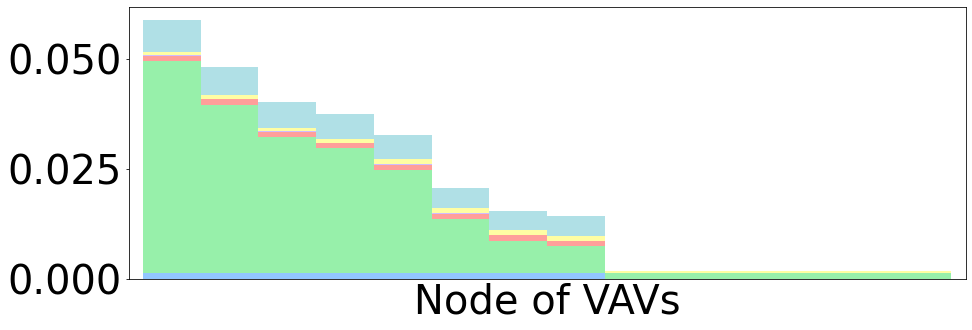

In [28]:
plt.figure(figsize=(14, 7), dpi=80)
centrality_summary_rice_vav.plot(x="Node of VAVs", y=["in_degree", "out_degree", "closeness", "betweenness", "pagerank", "hub", "authority"], \
                                 kind="bar", figsize=(15, 5), stacked=True, width=1.0, legend = None)
plt.xticks([])
# plt.legend(loc='upper right')

plt.savefig("rice.png", format="png", bbox_inches = 'tight', pad_inches = 0)
plt.show()

<Figure size 1120x560 with 0 Axes>

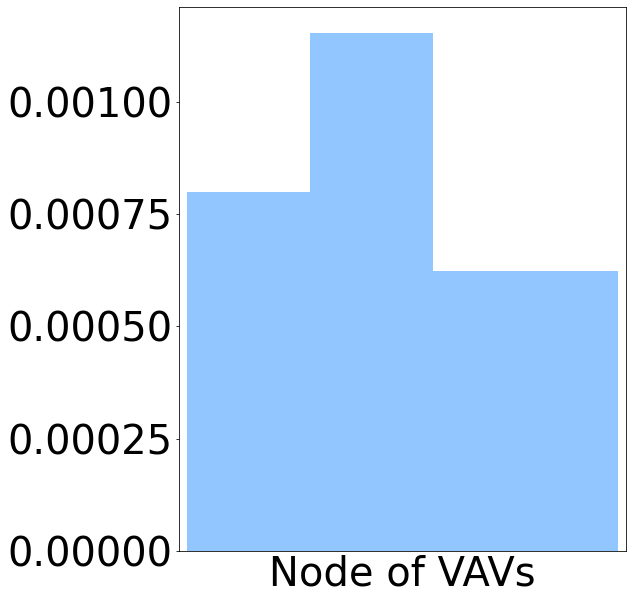

In [29]:
plt.figure(figsize=(14, 7), dpi=80)
centrality_summary_rice_vav.plot(x="Node of VAVs", y=["pagerank"], \
                                 kind="bar", figsize=(8, 10), stacked=True, width=1.0, legend = None)
plt.xticks([])
# plt.legend(loc='upper right')

plt.savefig("rice-page.png", format="png", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [30]:
centrality_summary_ebu_vav = centrality_summary_ebu_vav.rename(columns={"node":"Node of VAVs"})
centrality_summary_ebu_vav = centrality_summary_ebu_vav.rename(columns={"in_degree_centrality":"in_degree"})
centrality_summary_ebu_vav = centrality_summary_ebu_vav.rename(columns={"out_degree_centrality":"out_degree"})
centrality_summary_ebu_vav = centrality_summary_ebu_vav.rename(columns={"closeness_centrality":"closeness"})
centrality_summary_ebu_vav = centrality_summary_ebu_vav.rename(columns={"betweenness_centrality":"betweenness"})
centrality_summary_ebu_vav = centrality_summary_ebu_vav.rename(columns={"pagerank_centrality":"pagerank"})
centrality_summary_ebu_vav = centrality_summary_ebu_vav.rename(columns={"hub_centrality":"hub"})
centrality_summary_ebu_vav = centrality_summary_ebu_vav.rename(columns={"auth_centrality":"authority"})

centrality_summary_ebu_vav['total'] = centrality_summary_ebu_vav[['in_degree','out_degree','closeness', 'betweenness', 'pagerank', 'hub', 'authority']].mean(axis=1)

centrality_summary_ebu_vav = centrality_summary_ebu_vav.sort_values(by='total',ascending=False)

centrality_summary_ebu_vav

Node of VAVs  in_degree  \
2324  http://ucsd.edu/building/ontology/ebu3b#EBU3B_VAV_Rm_B210   0.004236   
1102  http://ucsd.edu/building/ontology/ebu3b#EBU3B_VAV_Rm_B260   0.004079   
159   http://ucsd.edu/building/ontology/ebu3b#EBU3B_VAV_Rm_B240   0.004079   
486   http://ucsd.edu/building/ontology/ebu3b#EBU3B_VAV_Rm_B270   0.004079   
302   http://ucsd.edu/building/ontology/ebu3b#EBU3B_VAV_Rm_B250   0.004079   
...                                                         ...        ...   
1106  http://ucsd.edu/building/ontology/ebu3b#EBU3B_VAV_Rm_4207   0.002353   
442   http://ucsd.edu/building/ontology/ebu3b#EBU3B_VAV_Rm_2209   0.002353   
756   http://ucsd.edu/building/ontology/ebu3b#EBU3B_VAV_Rm_3207   0.002353   
288   http://ucsd.edu/building/ontology/ebu3b#EBU3B_VAV_Rm_2207   0.002353   
2841  http://ucsd.edu/building/ontology/ebu3b#EBU3B_VAV_Rm_3218   0.000314   

      out_degree  closeness  betweenness  pagerank           hub  authority  \
2324    0.000314   0.023181     0.000011  0.000755  6.545138e-07   0.000752   
1102    0.000314   0.023063     0.000011  0.000729  6.519452e-07   0.000730   
159     0.000314   0.023063     0.000011  0.000729  6.519452e-07   0.000730   
486     0.000314   0.023063     0.000011  0.000729  6.519452e-07   0.000730   
302     0.000314   0.023063     0.000011  0.000729  6.519452e-07   0.000730   
...          ...        ...          ...       ...           ...        ...   
1106    0.000314   0.021783     0.000009  0.000448  5.979309e-07   0.000649   
442     0.000314   0.021783     0.000009  0.000448  5.979309e-07   0.000649   
756     0.000314   0.021783     0.000009  0.000448  5.979309e-07   0.000649   
288     0.000314   0.021783     0.000009  0.000448  5.979309e-07   0.000649   
2841    0.000000   0.000314     0.000000  0.000110  0.000000e+00   0.000012   

         total  
2324  0.004178  
1102  0.004132  
159   0.004132  
486   0.004132  
302   0.004132  
...        ...  
1106  0.003651  
442   0.003651  
756   0.003651  
288   0.003651  
2841  0.000107  

[219 rows x 9 columns]

<Figure size 1120x560 with 0 Axes>

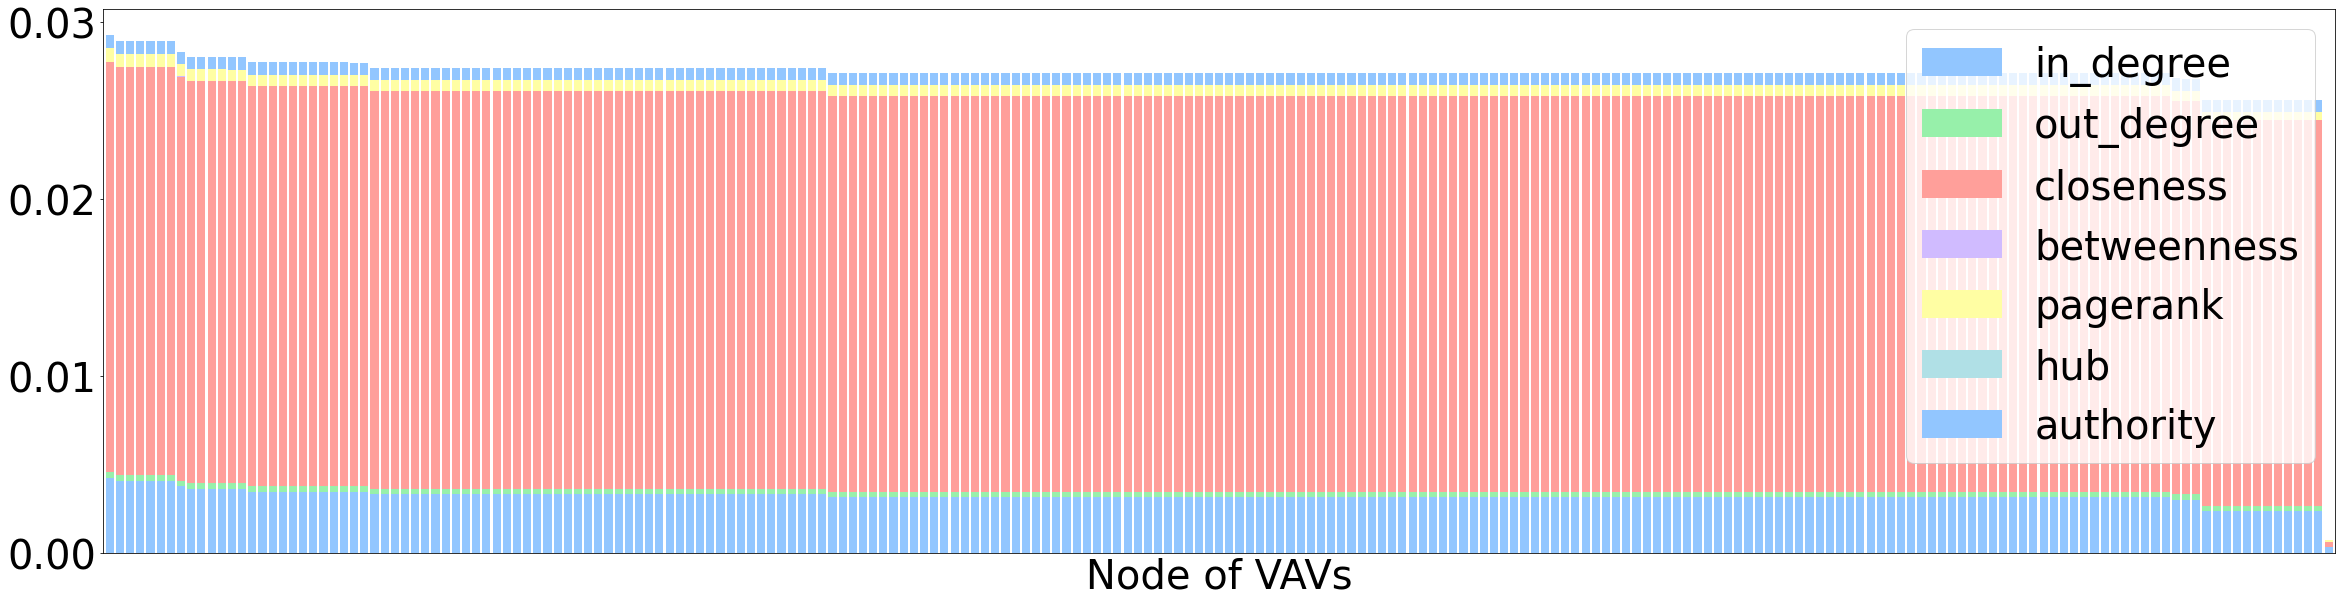

In [41]:
plt.figure(figsize=(14, 7), dpi=80)
centrality_summary_ebu_vav.plot(x="Node of VAVs", y=["in_degree", "out_degree", "closeness", "betweenness", "pagerank", "hub", "authority"], \
                                 kind="bar", figsize=(40,10), stacked=True, width=0.8)
plt.xticks([])
plt.legend(loc='upper right')

plt.savefig("ebu.png", format="png", bbox_inches = 'tight', pad_inches = 0)
plt.show()

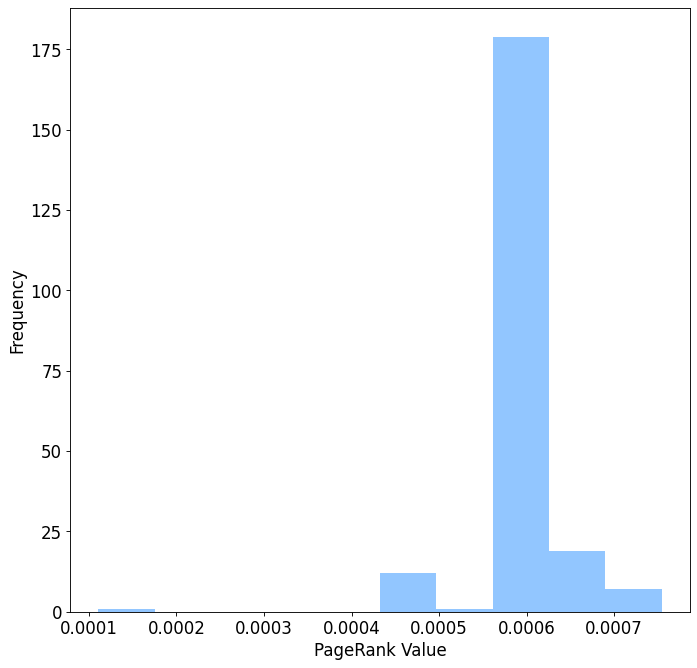

In [82]:
# centrality_summary_ebu_vav.plot(x="Node of VAVs", y=["pagerank"], \
#                                  kind="hist", figsize=(8, 10), stacked=True, width=1.0, legend = None)
plt.figure(figsize=(10, 10), dpi=80)
plt.hist(centrality_summary_ebu_vav.pagerank)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('PageRank Value');
# plt.xticks([])
# plt.legend(loc='upper right')

plt.savefig("ebu-page.png", format="png", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [33]:
centrality_summary_gtc_vav = centrality_summary_gtc_vav.rename(columns={"node":"Node of VAVs"})
centrality_summary_gtc_vav = centrality_summary_gtc_vav.rename(columns={"in_degree_centrality":"in_degree"})
centrality_summary_gtc_vav = centrality_summary_gtc_vav.rename(columns={"out_degree_centrality":"out_degree"})
centrality_summary_gtc_vav = centrality_summary_gtc_vav.rename(columns={"closeness_centrality":"closeness"})
centrality_summary_gtc_vav = centrality_summary_gtc_vav.rename(columns={"betweenness_centrality":"betweenness"})
centrality_summary_gtc_vav = centrality_summary_gtc_vav.rename(columns={"pagerank_centrality":"pagerank"})
centrality_summary_gtc_vav = centrality_summary_gtc_vav.rename(columns={"hub_centrality":"hub"})
centrality_summary_gtc_vav = centrality_summary_gtc_vav.rename(columns={"auth_centrality":"authority"})

centrality_summary_gtc_vav['total'] = centrality_summary_gtc_vav[['in_degree','out_degree','closeness', 'betweenness', 'pagerank', 'hub', 'authority']].mean(axis=1)

centrality_summary_gtc_vav = centrality_summary_gtc_vav.sort_values(by='total',ascending=False)

centrality_summary_gtc_vav

Node of VAVs  \
392   https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/10/vav   
1021   https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/1/vav   
113    https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/0/vav   
718   https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/11/vav   
1045   https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/5/vav   
168    https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/8/vav   
363    https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/3/vav   
420    https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/7/vav   
279    https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/4/vav   
63     https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/9/vav   
177    https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/6/vav   
438    https://brickschema.org/schema/1.0.2/building_example#building:gtc/vavs/2/vav   

      in_degree  out_degree  closeness  betweenness  pagerank       hub  \
392    0.003126    0.001954   0.026513     0.000947  0.000471  0.000072   
1021   0.003126    0.001954   0.024840     0.000812  0.000464  0.000067   
113    0.003126    0.001954   0.024610     0.000915  0.000476  0.000072   
718    0.003126    0.001954   0.024264     0.000874  0.000471  0.000071   
1045   0.003126    0.001954   0.024237     0.000819  0.000472  0.000071   
168    0.003126    0.001954   0.024069     0.000870  0.000473  0.000070   
363    0.003126    0.001954   0.023864     0.000887  0.000481  0.000072   
420    0.003126    0.001954   0.023084     0.000813  0.000472  0.000069   
279    0.003126    0.001954   0.022960     0.000807  0.000477  0.000069   
63     0.003126    0.001954   0.021114     0.000686  0.000465  0.000068   
177    0.003126    0.001954   0.018806     0.000617  0.000470  0.000068   
438    0.003126    0.001954   0.009060     0.000371  0.000462  0.000065   

      authority     total  
392    0.000212  0.004756  
1021   0.000165  0.004490  
113    0.000172  0.004475  
718    0.000196  0.004422  
1045   0.000216  0.004414  
168    0.000191  0.004393  
363    0.000168  0.004365  
420    0.000200  0.004245  
279    0.000184  0.004225  
63     0.000214  0.003947  
177    0.000153  0.003599  
438    0.000140  0.002168

<Figure size 1120x560 with 0 Axes>

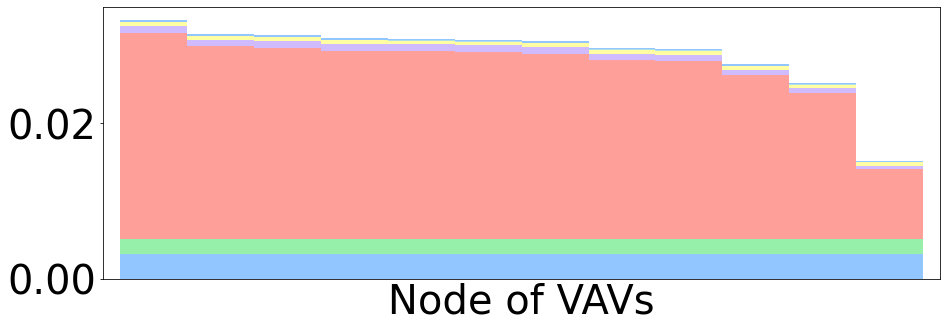

In [34]:
plt.figure(figsize=(14, 7), dpi=80)
centrality_summary_gtc_vav.plot(x="Node of VAVs", y=["in_degree", "out_degree", "closeness", "betweenness", "pagerank", "hub", "authority"], \
                                 kind="bar", figsize=(15, 5), stacked=True, width=1.0, legend = None)
plt.xticks([])
# plt.legend(loc='upper right')

plt.savefig("gtc.png", format="png", bbox_inches = 'tight', pad_inches = 0)
plt.show()

<Figure size 1120x560 with 0 Axes>

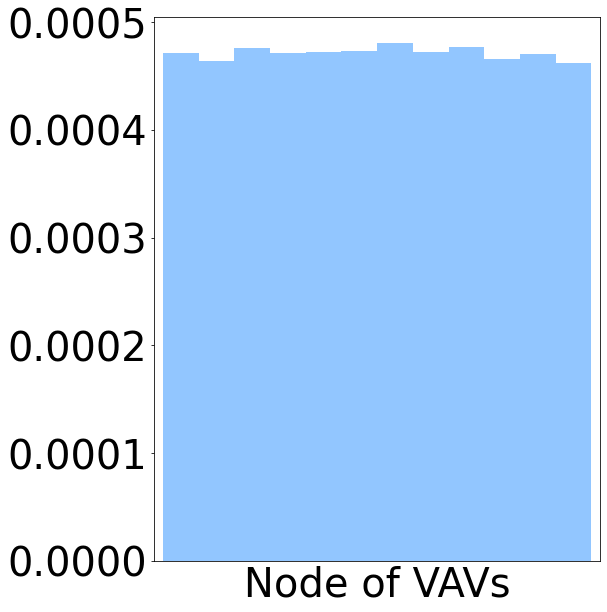

In [35]:
plt.figure(figsize=(14, 7), dpi=80)
centrality_summary_gtc_vav.plot(x="Node of VAVs", y=["pagerank"], \
                                 kind="bar", figsize=(8, 10), stacked=True, width=1.0, legend = None)
plt.xticks([])
# plt.legend(loc='upper right')

plt.savefig("gtc-page.png", format="png", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [36]:
from openpyxl import Workbook

with pd.ExcelWriter('pandas_to_excel.xlsx') as writer:
    centrality_summary_soda_vav.to_excel(writer, sheet_name='sheet1')